In [26]:
from pycolab import ascii_art
from pycolab.prefab_parts import sprites as prefab_sprites
from pycolab.rendering import ObservationToFeatureArray

import numpy as np
import pycolab
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

# Implementations

### Environments

#### 1. Blocking Maze

In [27]:
GAME_ART = ['###########',
            '#         #',
            '#         #',
            '#         #',
            '######### #',
            '#         #',
            '#   P     #',
            '###########']


def make_game():
    """Builds and returns a four-rooms game."""
    return ascii_art.ascii_art_to_game(GAME_ART, what_lies_beneath=' ', sprites={'P': PlayerSprite})


class PlayerSprite(prefab_sprites.MazeWalker):
    """A `Sprite` for our player.
    This `Sprite` ties actions to going in the four cardinal directions. If we
    reach a magical location, the agent receives a reward of 1 and the epsiode terminates.
    """

    def __init__(self, corner, position, character):
        """Inform superclass that the '#' delimits the walls."""
        super(PlayerSprite, self).__init__(corner, position, character, impassable='#')
    


    def update(self, actions, board, layers, backdrop, things, the_plot):
        del layers, backdrop, things   # Unused in this application.

        # Apply motion commands.
        if actions == 0:    # walk upward?
            self._north(board, the_plot)
            print('Walks up')
        elif actions == 1:  # walk downward?
            self._south(board, the_plot)
            print('Walks down')
        elif actions == 2:  # walk leftward?
            self._west(board, the_plot)
            print('Walks left')
        elif actions == 3:  # walk rightward?
            self._east(board, the_plot)
            print('Walks right')
        else:
            print('Doesnt move')

        # See if we've found the mystery spot.
        magical_location = (1, 9)
        if self.position == magical_location:
            the_plot.add_reward(1.0)
            the_plot.terminate_episode()

In [43]:
def show_board(obs):
    
    board = 8 * np.array(obs.layers['P'], dtype=np.float)
    board += 4 * np.array(obs.layers['#'], dtype=np.float)

    plt.figure()
    plt.imshow(board)
    plt.axis('off')
    plt.show()

Doesnt move
Walks up


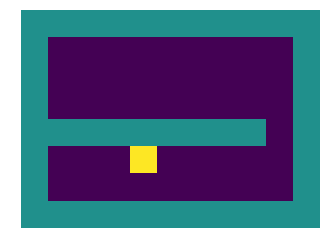

Walks left


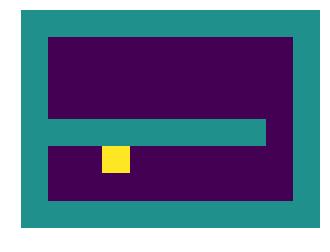

Walks right
Walks right
Walks right
Walks right


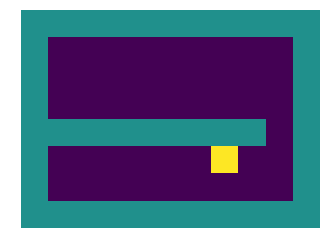

Walks right


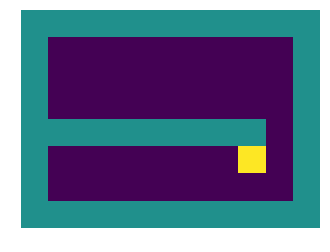

In [46]:
# Instanciates our game object
game = make_game()

# Finalize the engine. Set-up and compute the first observation of the game
obs, reward, gamma = game.its_showtime();

# Take several actions
obs, reward, gamma = game.play(0)
show_board(obs)
obs, reward, gamma = game.play(2)
show_board(obs)
obs, reward, gamma = game.play(3)
obs, reward, gamma = game.play(3)
obs, reward, gamma = game.play(3)
obs, reward, gamma = game.play(3)
show_board(obs)
obs, reward, gamma = game.play(3)
show_board(obs)

#### 2. Shortcut Maze

### Dyna-Q Algorithm

In [ ]:
def dynaQ():
    
    
    
    return

# Experiments

# How dows Dyna-Q relate to Experience Replay ?

# Conclusion